# EE379K: Lab 2
## Group Members: Irfan Hasan (ih3976), Peter Zhang (yz7724)

# Question 1

In [16]:
import numpy as np
import sympy


v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
matrix = np.vstack((v1, v2, v3, v4))

print('-------- Q1 --------\n')
print('A vector inside S is any vector that is a linear combination of v1, v2, v3, v4')
print('Thus [0,2,0,2] is a vector inside S')
print('A vector not inside S is [1,1,1,1]\n')
print('Perpendicular?\n')
print('To check if a new vector is in S we can see if the vector is a linear combination of the vectors in S\n')

print('-------- Q2 --------\n')
rank = np.linalg.matrix_rank(matrix)
print('The dimension of S is {}'.format(rank))

print('\n-------- Q3 ---------\n')
print('A QR decomposition provides an orthogonal basis for the column space of A')
print('If the rank of A is n, then the first n columns of q form a basis for the column space of A.\n')

q,r = np.linalg.qr(matrix.T) #need column space 

orth = q[:, :rank]
print('Orthonormal basis for S: \n')
print(orth)

-------- Q1 --------

A vector inside S is any vector that is a linear combination of v1, v2, v3, v4
Thus [0,2,0,2] is a vector inside S
A vector not inside S is [1,1,1,1]

Perpendicular?

To check if a new vector is in S we can see if the vector is a linear combination of the vectors in S

-------- Q2 --------

The dimension of S is 2

-------- Q3 ---------

A QR decomposition provides an orthogonal basis for the column space of A
If the rank of A is n, then the first n columns of q form a basis for the column space of A.

Orthonormal basis for S: 

[[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


# Question 2

### 1. Top 10 common words in ICML papers
Our machines runs out of memory when processing such large number of PDFs, so we only run the first 80 pdfs.

In [56]:
import urllib2
import re
from bs4 import BeautifulSoup

from cStringIO import StringIO
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import os
import sys, getopt

import operator

#converts pdf, returns its text content as a string
def convert(fname, pages=None):
    if not pages:
        pagenums = set()
    else:
        pagenums = set(pages)

    output = StringIO()
    manager = PDFResourceManager()
    converter = TextConverter(manager, output, laparams=LAParams())
    interpreter = PDFPageInterpreter(manager, converter)

    infile = file(fname, 'rb')
    for page in PDFPage.get_pages(infile, pagenums):
        interpreter.process_page(page)
    infile.close()
    converter.close()
    text = output.getvalue()
    output.close
    return text 

words = {}
response = urllib2.urlopen('http://proceedings.mlr.press/v70')
html = BeautifulSoup(response.read(), 'html.parser')
links = html.find_all('a', text=re.compile('Download PDF'))

for i in range(80):
    link = links[i]
    fname = link['href'].split('/')[-1]
    fname = "./pdfs/" + fname
    
    ''' # download all pdfs
    pdf = urllib2.urlopen(link['href']).read()
    with open('./pdfs/'+fname, 'wb') as f:
        f.write(pdf)
    '''
    
    data = convert(fname)
    for word in re.findall(r"[a-zA-Z]+", data):
        word = word.lower()
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

In [60]:
top10 = dict(sorted(words.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])
top10

{'a': 11941,
 'and': 11886,
 'cid': 7421,
 'for': 6826,
 'in': 10235,
 'is': 7497,
 'of': 13750,
 'the': 26862,
 'to': 9113,
 'we': 6290}

### 2. Calculate the entropy of Z, a randomly selected word in randomly selected ICML paper

In [35]:
import scipy as sc
import scipy.stats

result = {}
for word in re.findall(r"[a-zA-Z]+", convert('./pdfs/zhang17a.pdf')):
    word = word.lower()
    if word in result:
        result[word] += 1
    else:
        result[word] = 1

entropy = sc.stats.entropy(result.values())

print entropy

6.17186147208


### 3. Synthesize a random paragraph using the marginal distribution over words

Due to amount of information to process in all pdfs, only one PDF is used.

In [47]:
import operator
import random

result = {}
for word in re.findall(r"[a-zA-Z]+", convert('./pdfs/zhang17b.pdf')):
    word = word.lower()
    if word in result:
        result[word] += 1
    else:
        result[word] = 1
        
sorted_w = sorted(result.items(), key=operator.itemgetter(1), reverse=True)
total = sum(result.values())

In [49]:
import sys

for i in range(50):
    n = random.randint(0, total)
    count = 0
    for t in sorted_w:
        count += t[1]
        if count >= n:
            sys.stdout.write(t[0] + " ")
            break;
sys.stdout.flush()

toencoder metric important apply network domain dan feature introduced with to our the and samples in ritter sky is real neighbors every statistical match y and most if happens to to f framework in network r cid moment cid recent table marks in tractable f et to implies use seqgan 

# Question 3

### Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0dfd3110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0ec30410>]], dtype=object)

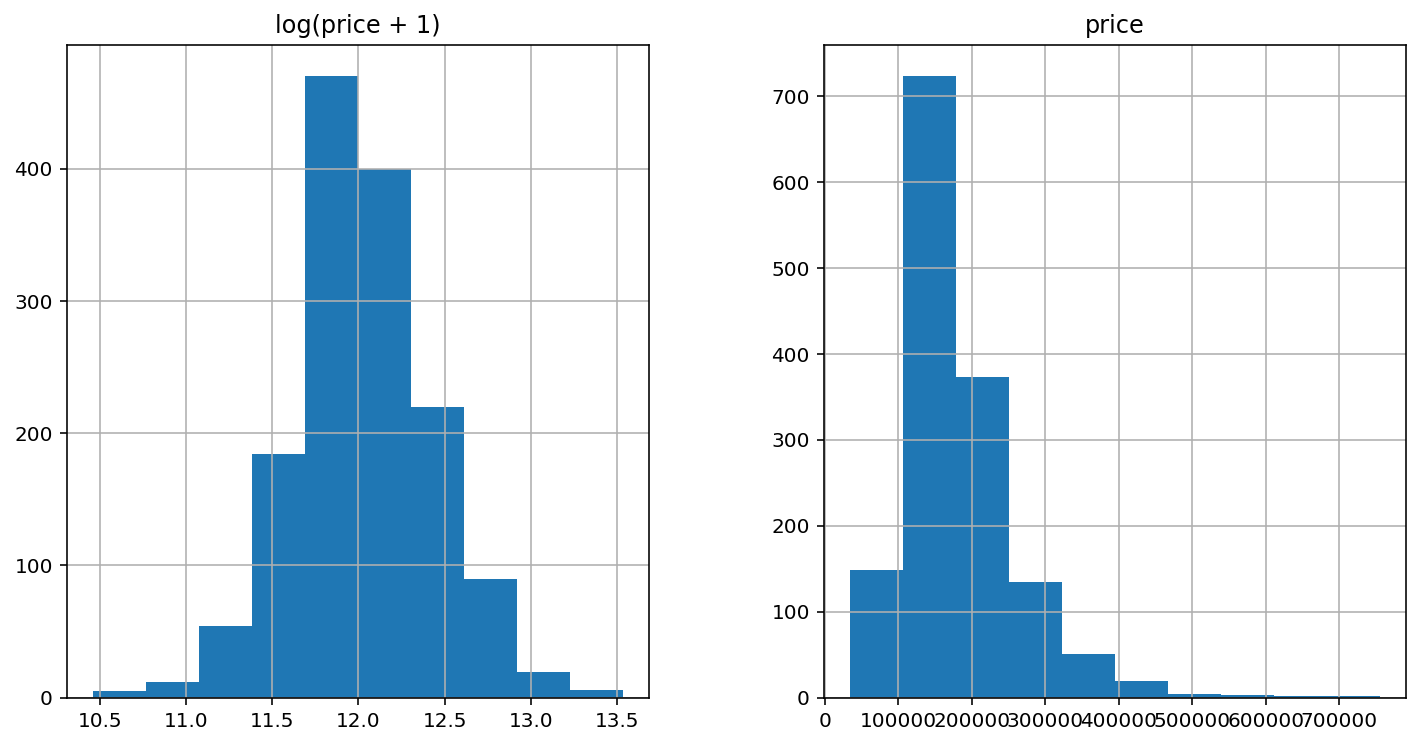

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [7]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [8]:
all_data = pd.get_dummies(all_data)

In [9]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [10]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

#### Models

In [11]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [12]:
model_ridge = Ridge()

In [13]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,u'rmse')

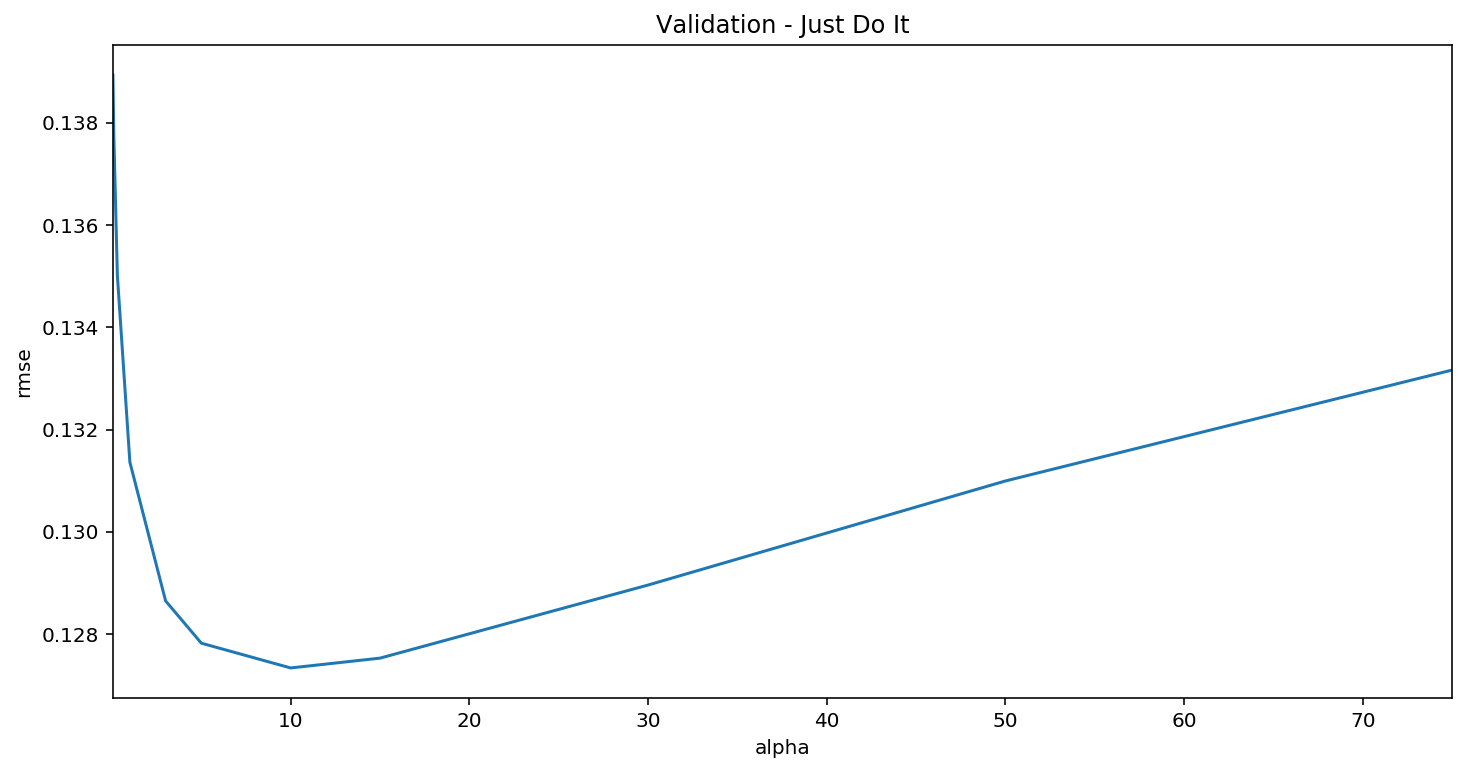

In [14]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [15]:
cv_ridge.min()

0.12733734668670763

In [16]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

In [17]:
rmse_cv(model_lasso).mean()

0.12314421090977448

In [18]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [19]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 111 variables and eliminated the other 177 variables


In [20]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,u'Coefficients in the Lasso Model')

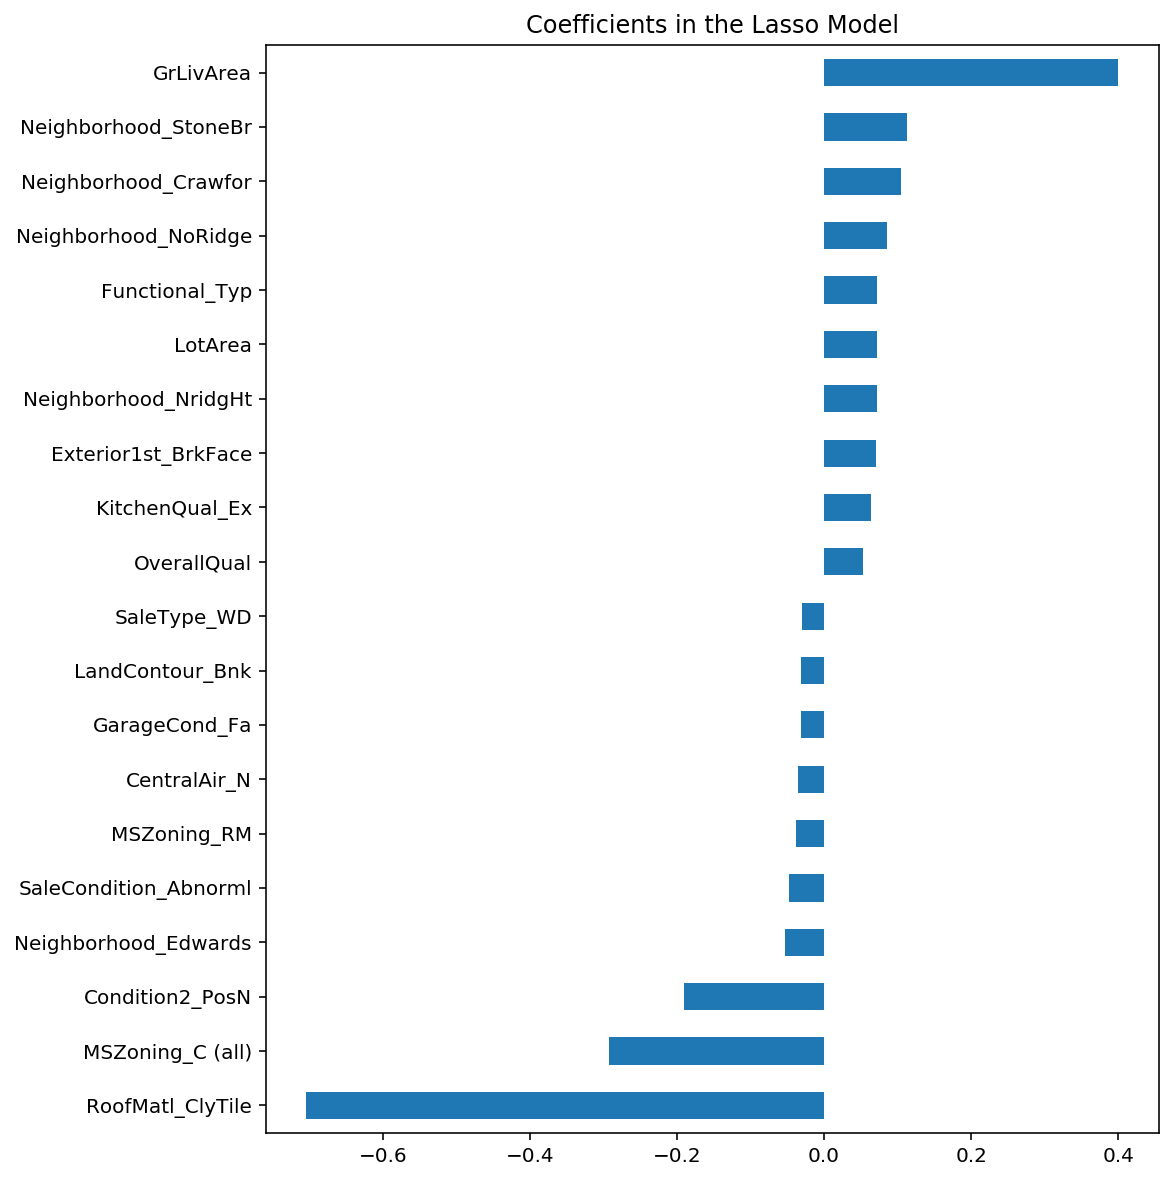

In [21]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

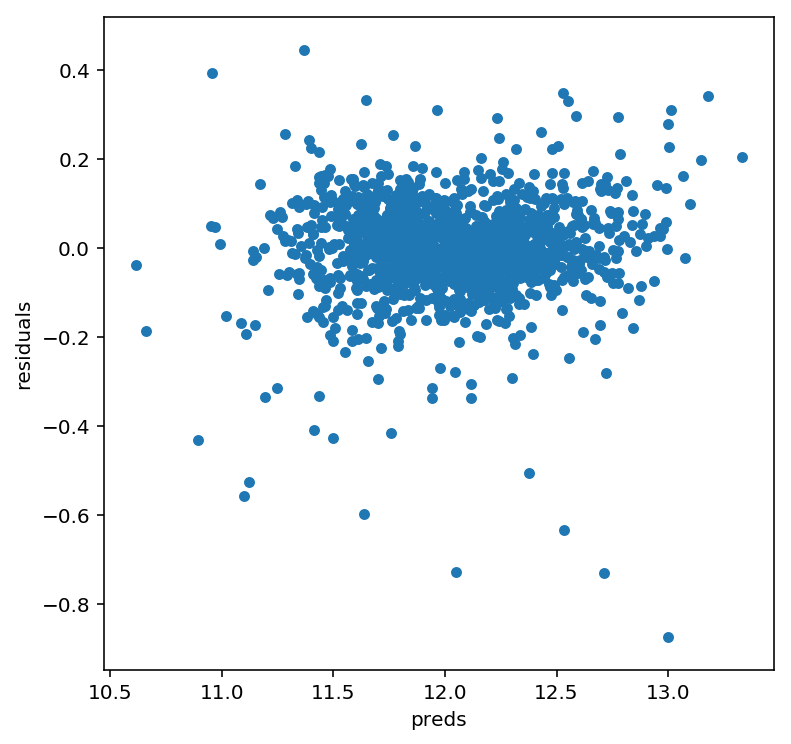

In [22]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [23]:
import xgboost as xgb

In [24]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

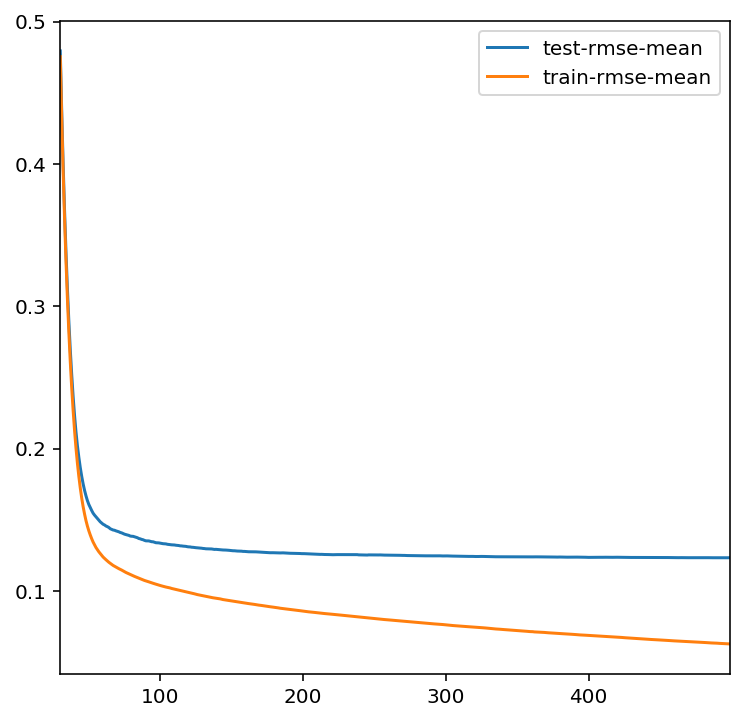

In [25]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

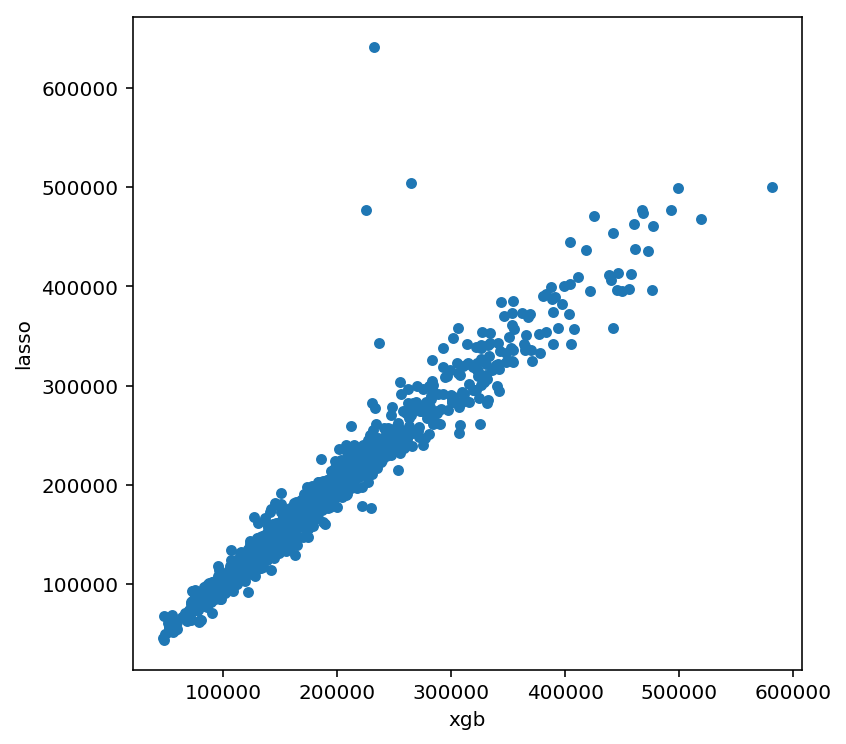

In [64]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y)

xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [65]:
preds = 0.3*lasso_preds + 0.7*xgb_preds

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

### Make alpha = 0.1 and submit the prediction.

In [66]:
model_r = Ridge(alpha=0.1).fit(X_train, y)
pred_r = np.expm1(model_r.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":pred_r})
solution.to_csv("0_1_ridge_sol.csv", index = False)

The ridge regession with alpha = 0.1 received a score of 0.13029.

### Our Model

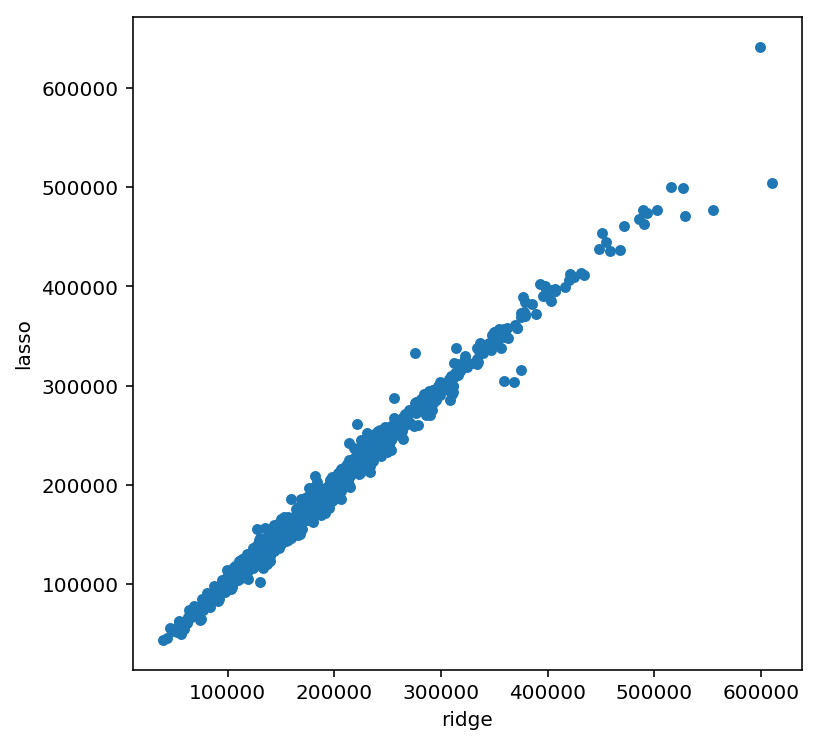

In [85]:
ridge_model = RidgeCV(alphas=[1, 0.1, 0.001, 0.0005]).fit(X_train, y)
lasso_model = LassoCV(alphas=[1, 0.1, 0.001, 0.0005]).fit(X_train, y)

ridge_pred = np.expm1(ridge_model.predict(X_test))
lasso_pred = np.expm1(lasso_model.predict(X_test))

predictions = pd.DataFrame({"ridge":ridge_pred, "lasso":lasso_preds})
predictions.plot(x='ridge', y='lasso', kind='scatter')

In [87]:
final_pred = 0.8*lasso_pred + 0.2*ridge_pred

solution = pd.DataFrame({"id":test.Id, "SalePrice":pred_r})
solution.to_csv("mysol.csv", index = False)

The model received a score of 0.12120.